In [1]:
#提出用の予測
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount("gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at gdrive


In [3]:
train_linear = pd.read_csv("gdrive/My Drive/signate-bank/data/train_linear3.csv")
test_linear = pd.read_csv("gdrive/My Drive/signate-bank/data/test_linear3.csv")

train_tree= pd.read_csv("gdrive/My Drive/signate-bank/data/train_tree3.csv")
test_tree = pd.read_csv("gdrive/My Drive/signate-bank/data/test_tree3.csv")

In [4]:
test_linear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18050 entries, 0 to 18049
Columns: 106 entries, default to behavier_cluster
dtypes: float64(47), int64(59)
memory usage: 14.6 MB


In [5]:
train_linear["prob_1"]

0        0.013328
1        0.225955
2        0.004382
3        0.006659
4        0.036322
           ...   
27095    0.004737
27096    0.024647
27097    0.071415
27098    0.019143
27099    0.003626
Name: prob_1, Length: 27100, dtype: float64

In [6]:
n_split = 5

valid_pred_2_1 = np.zeros(len(train_linear))
test_pred_2_1 = np.zeros((len(test_linear),n_split))

i = 0
skf = StratifiedKFold(n_splits=n_split,shuffle=True,random_state=0)
for train_idx,valid_idx in skf.split(train_linear.drop("y",axis=1),train_linear["y"]):

    x_train = train_linear.drop("y",axis=1).iloc[train_idx]
    y_train = train_linear["y"].iloc[train_idx]
    
    x_valid = train_linear.drop("y",axis=1).iloc[valid_idx]
    y_valid = train_linear["y"].iloc[valid_idx]
    
    lr = LogisticRegression(random_state=1)
    
    lr.fit(x_train,y_train)
    
    valid_pred_2_1[valid_idx] = lr.predict_proba(x_valid)[:,1]
    test_pred_2_1[:,i] = lr.predict_proba(test_linear)[:,1]
    
    i = i + 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


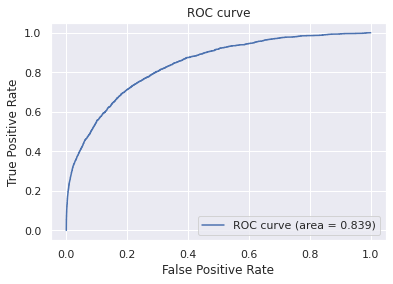

In [7]:
fpr, tpr, thresholds = metrics.roc_curve(train_tree["y"], valid_pred_2_1)

auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %.3f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [8]:
valid_pred_2_1 = pd.Series(valid_pred_2_1,name="prob_2_1")
test_pred_2_1 = pd.Series(test_pred_2_1.mean(axis=1),name="prob_2_1")

In [9]:
train_linear.columns.values

array(['default', 'housing', 'loan', 'poutcome', 'edu_unknown_flg',
       'balance_minus_flg', 'con_unknown_flg', 'duration_zero_flg',
       'pdays_flg', 'pou_unknown_flg', 'age', 'balance', 'day',
       'month+day', 'duration_sc', 'pdays_sc', 'job_1250', 'job_1306',
       'job_1661', 'job_1884', 'job_1890', 'job_4192', 'job_5339',
       'job_583', 'job_8128', 'job_8873', 'marital_1', 'marital_2',
       'contact_1', 'contact_2', 'campaign_2', 'campaign_3', 'campaign_4',
       'previous_1', 'previous_2', 'previous_3', 'month_10', 'month_11',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'education_1771', 'education_26754',
       'education_5560', 'poutcome_1', 'poutcome_2', 'prob_1', 'prob_2',
       'prob_3', 'prob_4', 'prob_5', 'prob_6', 'prob_7', 'prob_8',
       'prob_9', 'y', 'status_distance', 'behavier_distance', 'sta_clu_1',
       'sta_clu_2', 'sta_clu_3', 'sta_clu_4', 'sta_clu_5', 'sta_clu_6',
       'sta_clu_7', 

In [10]:
columns = [#'default', 'housing', 'loan', 'poutcome', 'balance_minus_flg',
       'edu_unknown_flg',
       'con_unknown_flg',
       #'duration_zero_flg', 'pdays_flg', 'age', 'balance', 'day',
       #'month+day', 'duration_sc', 'pdays_sc', 
       #'job_1250', 'job_1306','job_1661', 'job_1884', 'job_1890', 'job_4192', 'job_5339','job_583', 'job_8128', 'job_8873', 
       #'marital_1', 'marital_2',
       #'contact_1', 'contact_2', 
       #'campaign_2', 'campaign_3', 'campaign_4',
       #'previous_1', 'previous_2', 'previous_3', 
       #'month_10', 'month_11','month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7','month_8', 'month_9', 
       #'education_1771', 'education_26754','education_5560', 
       #'poutcome_1', 'poutcome_2', 
       'prob_1', 'prob_2',
       'prob_3', 'prob_4', 'prob_5', 'prob_6', 'prob_7', 'prob_8','prob_9',
       #'status_distance', 'behavier_distance', 
       #'sta_clu_1', 'sta_clu_2','sta_clu_3', 'sta_clu_4', 'sta_clu_5', 'sta_clu_6', 'sta_clu_7',
       #'beh_clu_1', 'beh_clu_2', 'beh_clu_3', 'beh_clu_4', 'beh_clu_5','beh_clu_6', 'beh_clu_7', 
       'age_binned', 
       'balance_binned',
       #1'duration_binned', 
       #1'pdays_binned', 
       'ageXbalance', 
       #1'eduXjob',
       #1'ageXjob', 
       #1'balanceXjob', 
       #1'ageXedu', 
       #1'ageXcontact',
       #1'balanceXcontact', 
       #1'durationXcontact', 
       #1'durationXpoutcome',
       #1'pdaysXpoutcome', 
       #1'jobXmonth', 
       'ageXmarital', 
       #1'jobXmarital',
       #1'eduXmarital', 
       #1'eduXcontact', 
       #1'eduXpoutcome', 
       #1'jobXpoutcome',
       #1'eduXbalance', 
       #1'balanceXmarital', 
       #1'balance/age',
       #1'campaign+previous', 
       #1'duration/num', 
       #1'durationXcampaign',
       #1'durationXage',
       #1'status_cluster', 
       #1'behavier_cluster'
          ]

In [11]:
tmp_train_linear = pd.concat([train_linear[columns],train_linear["y"]],axis=1)
tmp_test_linear = test_linear[columns]

In [12]:
tmp_train_linear

,edu_unknown_flg,con_unknown_flg,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,age_binned,balance_binned,ageXbalance,ageXmarital,y
0,0,0,0.013328,0.012472,0.009358,0.039733,0.02,0.015938,0.029266,0.005743,0.035294,0.046853,0.080826,0.036111,0.029279,0.0
1,0,0,0.225955,0.124788,0.163078,0.089056,0.11,0.118395,0.111083,0.069498,0.100000,0.097771,0.084834,0.087527,0.109603,1.0
2,0,0,0.004382,0.002172,0.007099,0.034349,0.04,0.005638,0.008727,0.004931,0.052941,0.040371,0.075102,0.063707,0.028306,0.0
3,0,1,0.006659,0.006015,0.035795,0.005501,0.04,0.000921,0.002535,0.001967,0.029412,0.044630,0.080282,0.036122,0.030572,0.0
4,0,0,0.036322,0.154770,0.096899,0.067868,0.14,0.094300,0.095153,0.090937,0.129412,0.131780,0.084834,0.081212,0.115441,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,0,0,0.004737,0.007879,0.005166,0.028354,0.00,0.017455,0.004538,0.004846,0.000000,0.107735,0.076780,0.070707,0.100793,0.0
27096,0,0,0.024647,0.020254,0.014477,0.036536,0.00,0.010105,0.021041,0.008750,0.000000,0.040371,0.086651,0.045802,0.028306,0.0
27097,1,0,0.071415,0.070294,0.085141,0.114836,0.11,0.117389,0.105250,0.080944,0.117647,0.040461,0.072155,0.080108,0.027505,0.0
27098,0,0,0.019143,0.029312,0.057831,0.049724,0.06,0.108423,0.084788,0.056395,0.052941,0.098365,0.080282,0.087520,0.108798,0.0


In [13]:
from keras.layers import Dense,Dropout,advanced_activations,BatchNormalization
from keras.models import Sequential
import keras

In [14]:
n_split = 5

skf = StratifiedKFold(n_splits=n_split,shuffle=True,random_state=0)
test_pred_2_2 = np.zeros((len(tmp_test_linear),n_split))
valid_pred_2_2 = np.zeros((len(tmp_train_linear)))

i = 0

for train_idx,valid_idx in skf.split(tmp_train_linear,tmp_train_linear["y"]):

    x_train = tmp_train_linear.drop("y",axis=1).iloc[train_idx]
    y_train = tmp_train_linear["y"].iloc[train_idx]

    x_valid = tmp_train_linear.drop("y",axis=1).iloc[valid_idx]
    y_valid = tmp_train_linear["y"].iloc[valid_idx]
    
    model = Sequential()
    model.add(Dense(32,activation="relu",input_shape=(x_train.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(16,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(32,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation="sigmoid"))

    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=[keras.metrics.AUC()])

    batch_size = 128
    epoch = 20

    history=model.fit(x_train,y_train,
                     batch_size=batch_size,epochs=epoch,
                     verbose=1,validation_data=(x_valid,y_valid))


    valid_pred_2_2[valid_idx] = model.predict(x_valid).reshape(-1)
    test_pred_2_2[:,i] = model.predict(tmp_test_linear).reshape(-1)
    
    i = i + 1

Epoch 1/20
170/170 [==============================] - 1s 4ms/step - loss: 0.4182 - auc: 0.5294 - val_loss: 0.2358 - val_auc: 0.7833
Epoch 2/20
170/170 [==============================] - 0s 2ms/step - loss: 0.2574 - auc: 0.7416 - val_loss: 0.2173 - val_auc: 0.8188
Epoch 3/20
170/170 [==============================] - 0s 2ms/step - loss: 0.2378 - auc: 0.7838 - val_loss: 0.2092 - val_auc: 0.8495
Epoch 4/20
170/170 [==============================] - 0s 2ms/step - loss: 0.2338 - auc: 0.7879 - val_loss: 0.2061 - val_auc: 0.8536
Epoch 5/20
170/170 [==============================] - 0s 2ms/step - loss: 0.2282 - auc: 0.7972 - val_loss: 0.2044 - val_auc: 0.8531
Epoch 6/20
170/170 [==============================] - 0s 2ms/step - loss: 0.2258 - auc: 0.8010 - val_loss: 0.2036 - val_auc: 0.8533
Epoch 7/20
170/170 [==============================] - 0s 3ms/step - loss: 0.2242 - auc: 0.8075 - val_loss: 0.2028 - val_auc: 0.8540
Epoch 8/20
170/170 [==============================] - 0s 2ms/step - loss: 0.

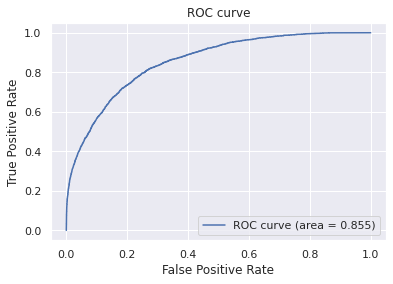

In [15]:
fpr, tpr, thresholds = metrics.roc_curve(tmp_train_linear["y"], valid_pred_2_2)

auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %.3f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [16]:
valid_pred_2_2 = pd.Series(valid_pred_2_2,name="prob_2_2")
test_pred_2_2 = pd.Series(test_pred_2_2.mean(axis=1),name="prob_2_2")

In [17]:
train_linear.columns.values

array(['default', 'housing', 'loan', 'poutcome', 'edu_unknown_flg',
       'balance_minus_flg', 'con_unknown_flg', 'duration_zero_flg',
       'pdays_flg', 'pou_unknown_flg', 'age', 'balance', 'day',
       'month+day', 'duration_sc', 'pdays_sc', 'job_1250', 'job_1306',
       'job_1661', 'job_1884', 'job_1890', 'job_4192', 'job_5339',
       'job_583', 'job_8128', 'job_8873', 'marital_1', 'marital_2',
       'contact_1', 'contact_2', 'campaign_2', 'campaign_3', 'campaign_4',
       'previous_1', 'previous_2', 'previous_3', 'month_10', 'month_11',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'education_1771', 'education_26754',
       'education_5560', 'poutcome_1', 'poutcome_2', 'prob_1', 'prob_2',
       'prob_3', 'prob_4', 'prob_5', 'prob_6', 'prob_7', 'prob_8',
       'prob_9', 'y', 'status_distance', 'behavier_distance', 'sta_clu_1',
       'sta_clu_2', 'sta_clu_3', 'sta_clu_4', 'sta_clu_5', 'sta_clu_6',
       'sta_clu_7', 

In [18]:
columns = ['default', 'housing', 'loan', 'poutcome', 'balance_minus_flg',
       'edu_unknown_flg',
       'con_unknown_flg',
       'duration_zero_flg', 'pdays_flg', 'age', 'balance', 'day',
       'month+day', 'duration_sc', 'pdays_sc', 
       'job_1250', 'job_1306','job_1661', 'job_1884', 'job_1890', 'job_4192', 'job_5339','job_583', 'job_8128', 'job_8873', 
       'marital_1', 'marital_2',
       'contact_1', 'contact_2', 
       'campaign_2', 'campaign_3', 'campaign_4',
       'previous_1', 'previous_2', 'previous_3', 
       'month_10', 'month_11','month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7','month_8', 'month_9', 
       'education_1771', 'education_26754','education_5560', 
       'poutcome_1', 'poutcome_2', 
       'prob_1', 'prob_2',
       'prob_3', 'prob_4', 'prob_5', 'prob_6', 'prob_7', 'prob_8','prob_9',
       'status_distance', 'behavier_distance', 
       #'sta_clu_1', 'sta_clu_2','sta_clu_3', 'sta_clu_4', 'sta_clu_5', 'sta_clu_6', 'sta_clu_7',
       #'beh_clu_1', 'beh_clu_2', 'beh_clu_3', 'beh_clu_4', 'beh_clu_5','beh_clu_6', 'beh_clu_7', 
       'age_binned', 
       'balance_binned',
       'duration_binned', 
       'pdays_binned', 
       'ageXbalance', 
       'eduXjob',
       'ageXjob', 
       'balanceXjob', 
       'ageXedu', 
       'ageXcontact',
       'balanceXcontact', 
       'durationXcontact', 
       'durationXpoutcome',
       'pdaysXpoutcome', 
       'jobXmonth', 
       'ageXmarital', 
       'jobXmarital',
       'eduXmarital', 
       'eduXcontact', 
       'eduXpoutcome', 
       'jobXpoutcome',
       'eduXbalance', 
       'balanceXmarital', 
       'balance/age',
       'campaign+previous', 
       'duration/num', 
       'durationXcampaign',
       'durationXage',
          ]

In [19]:
tmp_train_linear = pd.concat([train_linear[columns],train_linear["y"]],axis=1)
tmp_test_linear = test_linear[columns]

In [20]:
tmp_train_linear

,default,housing,loan,poutcome,balance_minus_flg,edu_unknown_flg,con_unknown_flg,duration_zero_flg,pdays_flg,age,balance,day,month+day,duration_sc,pdays_sc,job_1250,job_1306,job_1661,job_1884,job_1890,job_4192,job_5339,job_583,job_8128,job_8873,marital_1,marital_2,contact_1,contact_2,campaign_2,campaign_3,campaign_4,previous_1,previous_2,previous_3,month_10,month_11,month_2,month_3,month_4,...,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,status_distance,behavier_distance,age_binned,balance_binned,duration_binned,pdays_binned,ageXbalance,eduXjob,ageXjob,balanceXjob,ageXedu,ageXcontact,balanceXcontact,durationXcontact,durationXpoutcome,pdaysXpoutcome,jobXmonth,ageXmarital,jobXmarital,eduXmarital,eduXcontact,eduXpoutcome,jobXpoutcome,eduXbalance,balanceXmarital,balance/age,campaign+previous,duration/num,durationXcampaign,durationXage,y
0,0,1,0,2,0,0,0,0,1,-0.693855,-1.114015,0.495436,2.118140,-0.622056,0.252588,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,...,0.013328,0.012472,0.009358,0.039733,0.02,0.015938,0.029266,0.005743,0.035294,-0.837221,2.100690,0.046853,0.080826,0.084714,0.081005,0.036111,0.061456,0.036638,0.074866,0.042231,0.056705,0.095873,-0.622056,-1.244112,0.505176,0.065574,0.029279,0.062706,0.046459,0.073151,0.079305,0.078049,0.062835,0.063002,0.772965,0.067672,0.073048,0.078169,0.096469,0.0
1,0,0,0,1,0,0,0,0,1,-1.043986,-0.140798,0.612122,1.145652,-0.345991,1.063527,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0.225955,0.124788,0.163078,0.089056,0.11,0.118395,0.111083,0.069498,0.100000,0.458551,-0.936080,0.097771,0.084834,0.104502,0.081202,0.087527,0.065574,0.097771,0.043478,0.097771,0.064012,0.096977,-0.345991,-0.345991,1.063527,0.045977,0.109603,0.121793,0.121793,0.116733,0.088810,0.061713,0.114341,0.108138,0.146991,0.068077,0.072760,0.087263,0.088435,1.0
2,0,1,0,1,0,0,0,0,1,-0.056708,-1.115345,-0.671424,2.085616,0.588753,1.556451,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,...,0.004382,0.002172,0.007099,0.034349,0.04,0.005638,0.008727,0.004931,0.052941,-1.153317,1.661446,0.040371,0.075102,0.105320,0.080524,0.063707,0.107203,0.052709,0.102679,0.058486,0.046855,0.089859,0.588753,0.588753,1.556451,0.064439,0.028306,0.066553,0.080453,0.116350,0.089940,0.069610,0.091711,0.059850,0.063249,0.067429,0.072816,0.129534,0.105698,0.0
3,0,1,1,1,0,0,1,0,1,-0.693855,1.635521,-0.087994,0.150396,2.075625,-1.250034,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0.006659,0.006015,0.035795,0.005501,0.04,0.000921,0.002535,0.001967,0.029412,-0.058936,1.628654,0.044630,0.080282,0.111413,0.079846,0.036122,0.039887,0.022837,0.041344,0.037594,0.064316,0.049641,0.000000,2.075625,-1.250034,0.026689,0.030572,0.029591,0.046617,0.037923,0.050713,0.033499,0.070513,0.066906,-1.134814,0.067236,0.072793,0.042103,0.038409,0.0
4,0,1,0,1,0,0,0,0,1,1.601526,-0.173162,-1.604911,-1.388022,-0.253970,-0.641830,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,...,0.036322,0.154770,0.096899,0.067868,0.14,0.094300,0.095153,0.090937,0.129412,1.420779,-0.104615,0.131780,0.084834,0.036056,0.081025,0.081212,0.104294,0.137168,0.196721,0.086253,0.096234,0.085561,-0.507940,-0.253970,-0.641830,0.357143,0.115441,0.113573,0.065634,0.059459,0.057774,0.111538,0.071942,0.072146,-0.277323,0.068077,0.072760,0.039924,0.112434,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,0,1,0,1,0,0,0,0,1,0.235035,-0.659058,1.195552,0.186173,0.559693,-0.037601,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.004737,0.007879,0.005166,0.028354,0.00,0.017455,0.004538,0.004846,0.000000,-1.210628,-0.042809,0.107735,0.076780,0.035938,0.079703,0.070707,0.055344,0.087218,0.034707,0.084584,0.130244,0.089135,0.559693,0.559693,-0.037601,0.031987,0.100793,0.0496

In [21]:
n_split = 5

skf = StratifiedKFold(n_splits=n_split,shuffle=True,random_state=0)
test_pred_2_3 = np.zeros((len(tmp_test_linear),n_split))
valid_pred_2_3 = np.zeros((len(tmp_train_linear)))

i = 0

for train_idx,valid_idx in skf.split(tmp_train_linear,tmp_train_linear["y"]):

    x_train = tmp_train_linear.drop("y",axis=1).iloc[train_idx]
    y_train = tmp_train_linear["y"].iloc[train_idx]

    x_valid = tmp_train_linear.drop("y",axis=1).iloc[valid_idx]
    y_valid = tmp_train_linear["y"].iloc[valid_idx]
    
    model = Sequential()
    model.add(Dense(128,activation="relu",input_shape=(x_train.shape[1],)))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation="relu"))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(128,activation="relu"))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(1,activation="sigmoid"))

    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=[keras.metrics.AUC()])

    batch_size = 128
    epoch = 20

    history=model.fit(x_train,y_train,
                     batch_size=batch_size,epochs=epoch,
                     verbose=1,validation_data=(x_valid,y_valid))


    valid_pred_2_3[valid_idx] = model.predict(x_valid).reshape(-1)
    test_pred_2_3[:,i] = model.predict(tmp_test_linear).reshape(-1)
    
    i = i + 1

Epoch 1/20
170/170 [==============================] - 1s 7ms/step - loss: 0.4764 - auc_5: 0.5901 - val_loss: 0.2467 - val_auc_5: 0.7561
Epoch 2/20
170/170 [==============================] - 1s 5ms/step - loss: 0.2652 - auc_5: 0.6985 - val_loss: 0.2173 - val_auc_5: 0.8004
Epoch 3/20
170/170 [==============================] - 1s 5ms/step - loss: 0.2464 - auc_5: 0.7313 - val_loss: 0.2144 - val_auc_5: 0.8089
Epoch 4/20
170/170 [==============================] - 1s 5ms/step - loss: 0.2307 - auc_5: 0.7789 - val_loss: 0.2128 - val_auc_5: 0.8117
Epoch 5/20
170/170 [==============================] - 1s 5ms/step - loss: 0.2283 - auc_5: 0.7787 - val_loss: 0.2135 - val_auc_5: 0.8122
Epoch 6/20
170/170 [==============================] - 1s 5ms/step - loss: 0.2224 - auc_5: 0.7994 - val_loss: 0.2100 - val_auc_5: 0.8256
Epoch 7/20
170/170 [==============================] - 1s 5ms/step - loss: 0.2199 - auc_5: 0.8018 - val_loss: 0.2098 - val_auc_5: 0.8276
Epoch 8/20
170/170 [============================

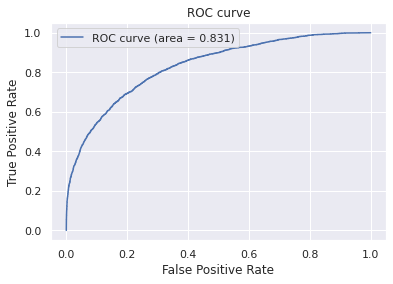

In [22]:
fpr, tpr, thresholds = metrics.roc_curve(tmp_train_linear["y"], valid_pred_2_3)

auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %.3f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [23]:
valid_pred_2_3 = pd.Series(valid_pred_2_3,name="prob_2_3")
test_pred_2_3 = pd.Series(test_pred_2_3.mean(axis=1),name="prob_2_3")

In [24]:
columns = ['default', 'housing', 'loan', 'poutcome', 'balance_minus_flg',
       'edu_unknown_flg',
       'con_unknown_flg',
       'duration_zero_flg', 'pdays_flg', 'age', 'balance', 'day',
       'month+day', 'duration_sc', 'pdays_sc', 
       'job_1250', 'job_1306','job_1661', 'job_1884', 'job_1890', 'job_4192', 'job_5339','job_583', 'job_8128', 'job_8873', 
       'marital_1', 'marital_2',
       'contact_1', 'contact_2', 
       'campaign_2', 'campaign_3', 'campaign_4',
       'previous_1', 'previous_2', 'previous_3', 
       'month_10', 'month_11','month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7','month_8', 'month_9', 
       'education_1771', 'education_26754','education_5560', 
       'poutcome_1', 'poutcome_2', 
       'prob_1', 'prob_2',
       'prob_3', 'prob_4', 'prob_5', 'prob_6', 'prob_7', 'prob_8','prob_9',
       #'status_distance', 'behavier_distance', 
       #'sta_clu_1', 'sta_clu_2','sta_clu_3', 'sta_clu_4', 'sta_clu_5', 'sta_clu_6', 'sta_clu_7',
       #'beh_clu_1', 'beh_clu_2', 'beh_clu_3', 'beh_clu_4', 'beh_clu_5','beh_clu_6', 'beh_clu_7', 
       'age_binned', 
       'balance_binned',
       #'duration_binned', 
       #'pdays_binned', 
       'ageXbalance', 
       #'eduXjob',
       #'ageXjob', 
       #'balanceXjob', 
       #'ageXedu', 
       #'ageXcontact',
       #'balanceXcontact', 
       #'durationXcontact', 
       #'durationXpoutcome',
       #'pdaysXpoutcome', 
       #'jobXmonth', 
       'ageXmarital', 
       #'jobXmarital',
       #'eduXmarital', 
       #'eduXcontact', 
       #'eduXpoutcome', 
       #'jobXpoutcome',
       #'eduXbalance', 
       #'balanceXmarital', 
       #'balance/age',
       #'campaign+previous', 
       #'duration/num', 
       #'durationXcampaign',
       #'durationXage',
       #'status_cluster', 
       #'behavier_cluster'
          ]

In [25]:
tmp_train_linear = pd.concat([train_linear[columns],train_linear["y"]],axis=1)
tmp_test_linear = test_linear[columns]

In [26]:
tmp_train_linear

,default,housing,loan,poutcome,balance_minus_flg,edu_unknown_flg,con_unknown_flg,duration_zero_flg,pdays_flg,age,balance,day,month+day,duration_sc,pdays_sc,job_1250,job_1306,job_1661,job_1884,job_1890,job_4192,job_5339,job_583,job_8128,job_8873,marital_1,marital_2,contact_1,contact_2,campaign_2,campaign_3,campaign_4,previous_1,previous_2,previous_3,month_10,month_11,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,education_1771,education_26754,education_5560,poutcome_1,poutcome_2,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,age_binned,balance_binned,ageXbalance,ageXmarital,y
0,0,1,0,2,0,0,0,0,1,-0.693855,-1.114015,0.495436,2.118140,-0.622056,0.252588,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0.013328,0.012472,0.009358,0.039733,0.02,0.015938,0.029266,0.005743,0.035294,0.046853,0.080826,0.036111,0.029279,0.0
1,0,0,0,1,0,0,0,0,1,-1.043986,-0.140798,0.612122,1.145652,-0.345991,1.063527,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.225955,0.124788,0.163078,0.089056,0.11,0.118395,0.111083,0.069498,0.100000,0.097771,0.084834,0.087527,0.109603,1.0
2,0,1,0,1,0,0,0,0,1,-0.056708,-1.115345,-0.671424,2.085616,0.588753,1.556451,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.004382,0.002172,0.007099,0.034349,0.04,0.005638,0.008727,0.004931,0.052941,0.040371,0.075102,0.063707,0.028306,0.0
3,0,1,1,1,0,0,1,0,1,-0.693855,1.635521,-0.087994,0.150396,2.075625,-1.250034,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0.006659,0.006015,0.035795,0.005501,0.04,0.000921,0.002535,0.001967,0.029412,0.044630,0.080282,0.036122,0.030572,0.0
4,0,1,0,1,0,0,0,0,1,1.601526,-0.173162,-1.604911,-1.388022,-0.253970,-0.641830,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0.036322,0.154770,0.096899,0.067868,0.14,0.094300,0.095153,0.090937,0.129412,0.131780,0.084834,0.081212,0.115441,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,0,1,0,1,0,0,0,0,1,0.235035,-0.659058,1.195552,0.186173,0.559693,-0.037601,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0.004737,0.007879,0.005166,0.028354,0.00,0.017455,0.004538,0.004846,0.000000,0.107735,0.076780,0.070707,0.100793,0.0
27096,0,1,0,1,0,0,0,0,1,-0.056708,-0.168570,1.195552,0.186173,-0.525191,1.131106,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0.024647,0.020254,0.014477,0.036536,0.00,0.010105,0.021041,0.008750,0.000000,0.040371,0.086651,0.045802,0.028306,0.0
27097,0,0,0,2,0,1,0,0,1,-0.056708,-0.409840,1.312238,0.514673,-0.253970,-1.246059,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0.071415,0.070294,0.085141,0.114836,0.11,0.117389,0.105250,0.080944,0.117647,0.040461,0.072155,0.080108,0.027505,0.0
27098,0,1,0,1,0,0,0,0,1,-0.866002,1.651355,1.195552,0.186173,-0.525191,-1.329538,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0.019143,0.029312,0.057831,0.049724,0.06,0.108423,0.084788,0.056395,0.052941,0.098365,0.080282,0.087520,0.108798,0.0


In [27]:
n_split = 5

skf = StratifiedKFold(n_splits=n_split,shuffle=True,random_state=2)
test_pred_2_4 = np.zeros((len(tmp_test_linear),n_split))
valid_pred_2_4 = np.zeros((len(tmp_train_linear)))

i = 0

for train_idx,valid_idx in skf.split(tmp_train_linear,tmp_train_linear["y"]):

    x_train = tmp_train_linear.drop("y",axis=1).iloc[train_idx]
    y_train = tmp_train_linear["y"].iloc[train_idx]

    x_valid = tmp_train_linear.drop("y",axis=1).iloc[valid_idx]
    y_valid = tmp_train_linear["y"].iloc[valid_idx]
    
    model = Sequential()
    model.add(Dense(10,activation=advanced_activations.LeakyReLU(alpha=0.1),input_shape=(x_train.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(5,activation=advanced_activations.LeakyReLU(alpha=0.1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    #model.add(Dense(30,activation=advanced_activations.LeakyReLU(alpha=0.1)))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.2))
    model.add(Dense(1,activation="sigmoid"))

    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=[keras.metrics.AUC()])

    batch_size = 512
    epoch = 30

    history=model.fit(x_train,y_train,
                     batch_size=batch_size,epochs=epoch,
                     verbose=1,validation_data=(x_valid,y_valid))


    valid_pred_2_4[valid_idx] = model.predict(x_valid).reshape(-1)
    test_pred_2_4[:,i] = model.predict(tmp_test_linear).reshape(-1)
    
    i = i + 1

Epoch 1/30
43/43 [==============================] - 1s 13ms/step - loss: 0.9233 - auc_10: 0.4931 - val_loss: 0.6011 - val_auc_10: 0.6359
Epoch 2/30
43/43 [==============================] - 0s 5ms/step - loss: 0.6900 - auc_10: 0.5977 - val_loss: 0.5226 - val_auc_10: 0.6927
Epoch 3/30
43/43 [==============================] - 0s 4ms/step - loss: 0.5939 - auc_10: 0.6445 - val_loss: 0.4821 - val_auc_10: 0.7016
Epoch 4/30
43/43 [==============================] - 0s 5ms/step - loss: 0.5297 - auc_10: 0.6722 - val_loss: 0.4507 - val_auc_10: 0.7070
Epoch 5/30
43/43 [==============================] - 0s 5ms/step - loss: 0.4823 - auc_10: 0.6807 - val_loss: 0.4264 - val_auc_10: 0.7158
Epoch 6/30
43/43 [==============================] - 0s 5ms/step - loss: 0.4396 - auc_10: 0.6908 - val_loss: 0.3994 - val_auc_10: 0.7235
Epoch 7/30
43/43 [==============================] - 0s 4ms/step - loss: 0.4024 - auc_10: 0.6980 - val_loss: 0.3707 - val_auc_10: 0.7353
Epoch 8/30
43/43 [=============================

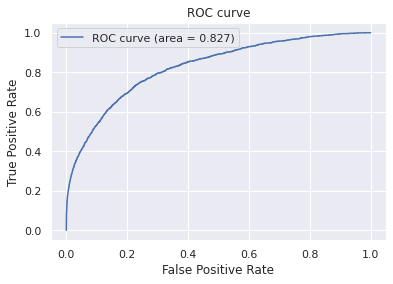

In [28]:
fpr, tpr, thresholds = metrics.roc_curve(tmp_train_linear["y"], valid_pred_2_4)

auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %.3f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [29]:
valid_pred_2_4 = pd.Series(valid_pred_2_4,name="prob_2_4")
test_pred_2_4 = pd.Series(test_pred_2_4.mean(axis=1),name="prob_2_4")

In [30]:
#SVMは処理時間がかかりすぎるのと、精度があまり高くなかったので不採用
#n_split = 10

#sv_valid_pred = np.zeros((len(train_linear),2))
#sv_test_pred = np.zeros((len(test_linear),n_split))

#i = 0
#skf = StratifiedKFold(n_splits=n_split,shuffle=True,random_state=0)
#for train_idx,valid_idx in skf.split(train_linear.drop("y",axis=1),train_linear["y"]):

#    x_train = train_linear.drop("y",axis=1).iloc[train_idx]
#    y_train = train_linear["y"].iloc[train_idx]
#    
#    x_valid = train_linear.drop("y",axis=1).iloc[valid_idx]
#    y_valid = train_linear["y"].iloc[valid_idx]
    
#    svc = SVC(kernel="linear",gamma=0.3,C=0.8,probability=True)
    
#    svc.fit(x_train,y_train)
    
#    sv_valid_pred[valid_idx] = svc.predict_proba(x_valid)
#    sv_test_pred[:,i] = svc.predict_proba(test_linear)[:,1]
    
#    i = i + 1

In [31]:
#tmp1 = pd.concat([train_linear["y"],pd.Series(sv_valid_pred[:,1],name="pred")],axis=1)

In [32]:
#tmp1.groupby("y")["pred"].describe()

In [33]:
#train_dt_pred = pd.Series(dt_valid_pred,name="dt_pred")
#test_dt_pred = pd.Series(dt_test_pred.mean(axis=1),name="dt_pred")

In [34]:
#train_sv_pred = pd.Series(sv_valid_pred[:,1],name="sv_pred")
#test_sv_pred = pd.Series(sv_test_pred.mean(axis=1),name="sv_pred")

In [35]:
#train_sample = pd.read_csv("../../data/signate-bankcustomer/train_tree3.csv")
#test_sample = pd.read_csv("../../data/signate-bankcustomer/test_tree3.csv")

In [36]:
train_tree = pd.concat([train_tree,valid_pred_2_1,valid_pred_2_2,valid_pred_2_3,valid_pred_2_4],axis=1)
test_tree = pd.concat([test_tree,test_pred_2_1,test_pred_2_2,test_pred_2_3,test_pred_2_4],axis=1)

In [37]:
train_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27100 entries, 0 to 27099
Data columns (total 69 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job                27100 non-null  int64  
 1   marital            27100 non-null  int64  
 2   education          27100 non-null  int64  
 3   default            27100 non-null  int64  
 4   housing            27100 non-null  int64  
 5   loan               27100 non-null  int64  
 6   contact            27100 non-null  int64  
 7   month              27100 non-null  int64  
 8   campaign           27100 non-null  int64  
 9   previous           27100 non-null  int64  
 10  poutcome           27100 non-null  int64  
 11  edu_unknown_flg    27100 non-null  int64  
 12  balance_minus_flg  27100 non-null  int64  
 13  con_unknown_flg    27100 non-null  int64  
 14  duration_zero_flg  27100 non-null  int64  
 15  pdays_flg          27100 non-null  int64  
 16  pou_unknown_flg    271

In [38]:
n_split = 5

valid_pred = np.zeros(len(train_tree))
test_pred = np.zeros((len(test_tree),n_split))

list_futere_importance = []

i = 0
skf = StratifiedKFold(n_splits=n_split,shuffle=True,random_state=1)
for train_idx,valid_idx in skf.split(train_tree.drop("y",axis=1),train_tree["y"]):
    
    x_train = train_tree.drop("y",axis=1).iloc[train_idx]
    y_train = train_tree["y"].iloc[train_idx]
    
    x_valid = train_tree.drop("y",axis=1).iloc[valid_idx]
    y_valid = train_tree["y"].iloc[valid_idx]
    
    dtrain = xgb.DMatrix(x_train,label=y_train)
    dvalid = xgb.DMatrix(x_valid,label=y_valid)
    dtest = xgb.DMatrix(test_tree)

    params = {'objective':'binary:logistic',
             'eval_metric':'auc',
             'silent':1,
             'random_state':1,
             'eta':0.1,
             'max_depth':1
             }
    
    watch_list = [(dtrain,'train'),(dvalid,'eval')]
    num_round = 150
  
    model = xgb.train(params,dtrain,num_round,evals=watch_list)

    valid_pred[valid_idx] = model.predict(dvalid,ntree_limit=model.best_ntree_limit)
    test_pred[:,i] = model.predict(dtest,ntree_limit=model.best_ntree_limit)
    
    list_futere_importance.append(sorted(model.get_fscore().items()))
    
    i = i + 1


[0]	train-auc:0.629083	eval-auc:0.610496
[1]	train-auc:0.652921	eval-auc:0.649816
[2]	train-auc:0.708859	eval-auc:0.705382
[3]	train-auc:0.709136	eval-auc:0.705423
[4]	train-auc:0.781189	eval-auc:0.771459
[5]	train-auc:0.789007	eval-auc:0.773852
[6]	train-auc:0.801861	eval-auc:0.784677
[7]	train-auc:0.802022	eval-auc:0.784738
[8]	train-auc:0.809762	eval-auc:0.792507
[9]	train-auc:0.811063	eval-auc:0.791876
[10]	train-auc:0.811075	eval-auc:0.791984
[11]	train-auc:0.817278	eval-auc:0.799695
[12]	train-auc:0.818682	eval-auc:0.801474
[13]	train-auc:0.82258	eval-auc:0.809835
[14]	train-auc:0.822677	eval-auc:0.809741
[15]	train-auc:0.828573	eval-auc:0.819492
[16]	train-auc:0.832926	eval-auc:0.824736
[17]	train-auc:0.833188	eval-auc:0.824946
[18]	train-auc:0.833188	eval-auc:0.8252
[19]	train-auc:0.83696	eval-auc:0.829938
[20]	train-auc:0.841423	eval-auc:0.835695
[21]	train-auc:0.841431	eval-auc:0.835585
[22]	train-auc:0.842477	eval-auc:0.837474
[23]	train-auc:0.842562	eval-auc:0.837507
[24]	t

In [39]:
valid_pred = pd.Series(valid_pred,name="prob")

In [40]:
total_futere_importance = [[elem[0],0] for elem in list_futere_importance[0]]

In [41]:
for futere_importance in list_futere_importance:
    for total,value in zip(total_futere_importance,futere_importance):
        total[1] += value[1]
    

In [42]:
low_importances = sorted(total_futere_importance,key=lambda x:x[1])[:15]
low_importances

[['education', 5],
 ['pdaysXpoutcome', 6],
 ['balanceXjob', 9],
 ['ageXjob', 11],
 ['behavier_distance', 11],
 ['age_binned', 12],
 ['eduXjob', 13],
 ['prob_2', 14],
 ['eduXbalance', 15],
 ['jobXmarital', 15],
 ['ageXbalance', 16],
 ['prob_7', 17],
 ['ageXmarital', 18],
 ['jobXmonth', 19],
 ['status_distance', 19]]

In [43]:
low_importances = [elem[0] for elem in low_importances]

In [44]:
low_importances

['education',
 'pdaysXpoutcome',
 'balanceXjob',
 'ageXjob',
 'behavier_distance',
 'age_binned',
 'eduXjob',
 'prob_2',
 'eduXbalance',
 'jobXmarital',
 'ageXbalance',
 'prob_7',
 'ageXmarital',
 'jobXmonth',
 'status_distance']

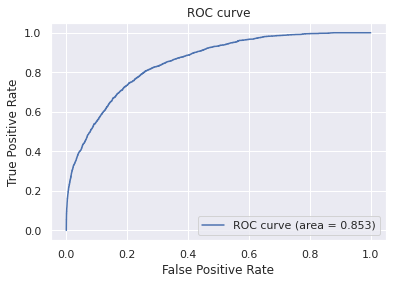

In [45]:
fpr, tpr, thresholds = metrics.roc_curve(train_tree["y"], valid_pred)

auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %.3f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

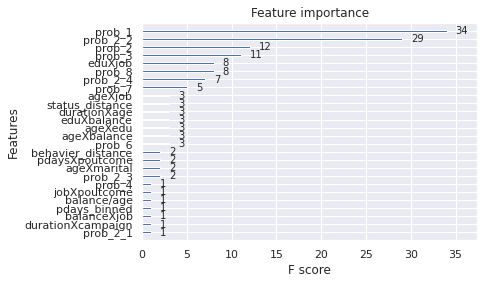

In [46]:
xgb.plot_importance(model)

In [47]:
tmp = pd.Series(valid_pred,name="proba")

In [48]:
tmp1 = pd.concat([train_tree,tmp],axis=1)

In [49]:
test_pred

array([[0.76231354, 0.72322619, 0.6626994 , 0.70096034, 0.73913765],
       [0.15451612, 0.13996066, 0.15180801, 0.14068723, 0.13611521],
       [0.02875237, 0.02190146, 0.02874307, 0.027479  , 0.0249045 ],
       ...,
       [0.06636024, 0.05516751, 0.05538766, 0.05745892, 0.05639869],
       [0.00288768, 0.00415396, 0.00457131, 0.00393728, 0.00505395],
       [0.14780788, 0.1402643 , 0.14519185, 0.15162395, 0.12301336]])

In [50]:
test_pred_prob = pd.DataFrame(test_pred)

In [51]:
submission = test_pred_prob.mean(axis=1)

In [52]:
submission.to_csv("gdrive/My Drive/signate-bank/data/submission.csv",header=False)

In [53]:
test_pred_prob.mean(axis=1)

0        0.717667
1        0.144617
2        0.026356
3        0.001361
4        0.039963
           ...   
18045    0.009503
18046    0.001653
18047    0.058155
18048    0.004121
18049    0.141580
Length: 18050, dtype: float64